In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
churn_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv', index_col = 'id')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [4]:
churn_data.drop(['CustomerId','Surname'],axis = 1, inplace = True)
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


<Axes: xlabel='CreditScore', ylabel='Density'>

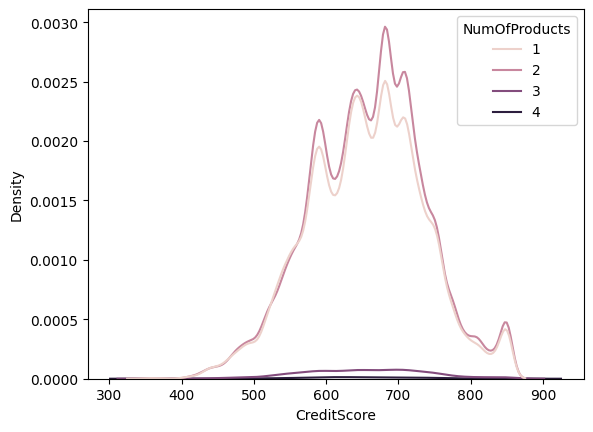

In [5]:
sns.kdeplot(data = churn_data,x = 'CreditScore', hue = 'NumOfProducts')

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

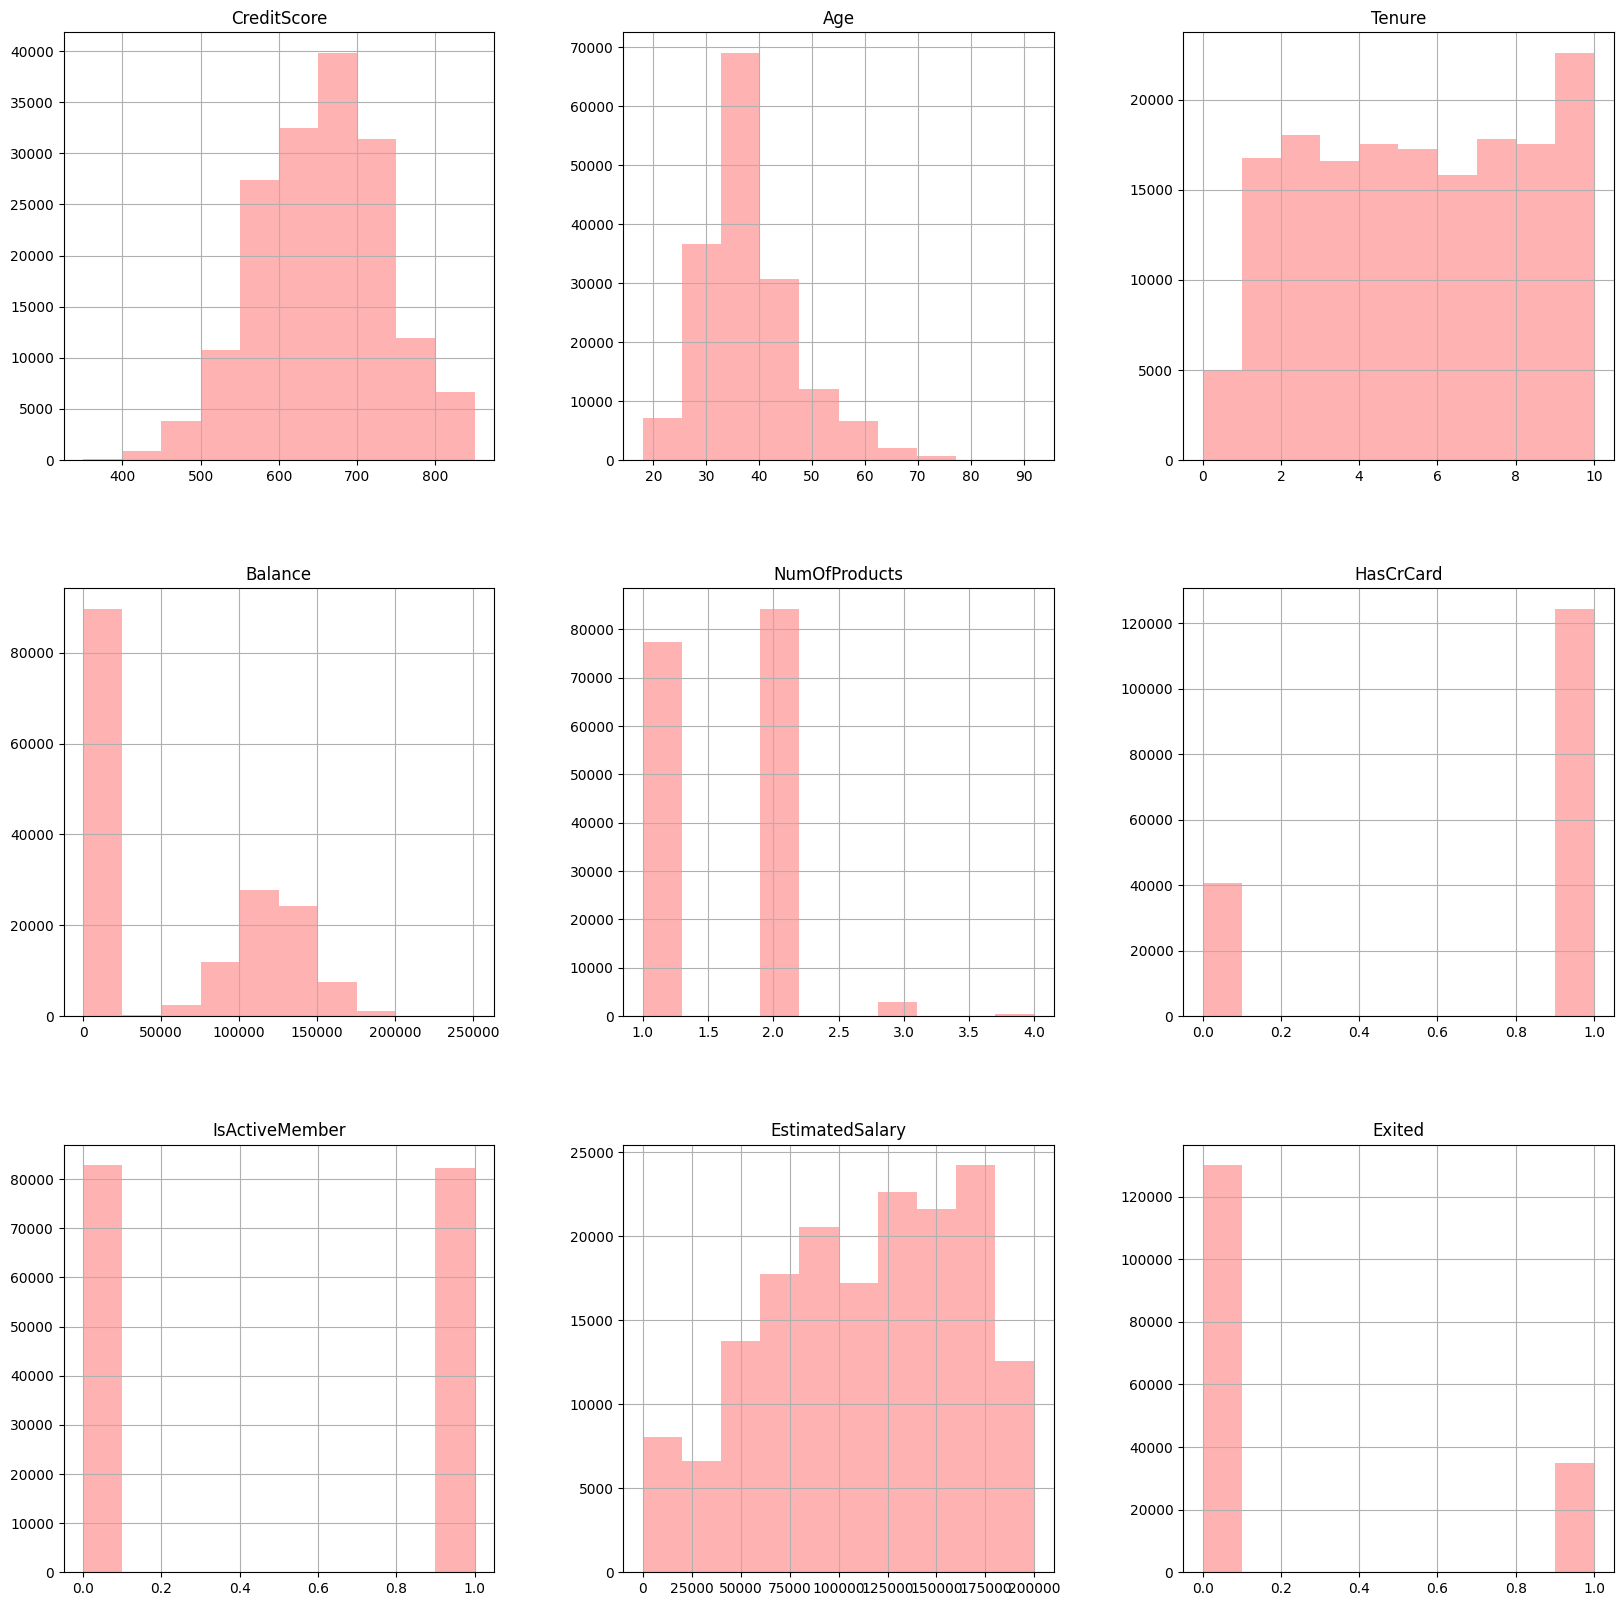

In [6]:
churn_data.hist(figsize=(20,20),color='r',alpha=0.3)

/tmp/ipykernel_18/106139272.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=churn_data, x='Age', hue='Exited', shade=True)


<Axes: xlabel='Age', ylabel='Density'>

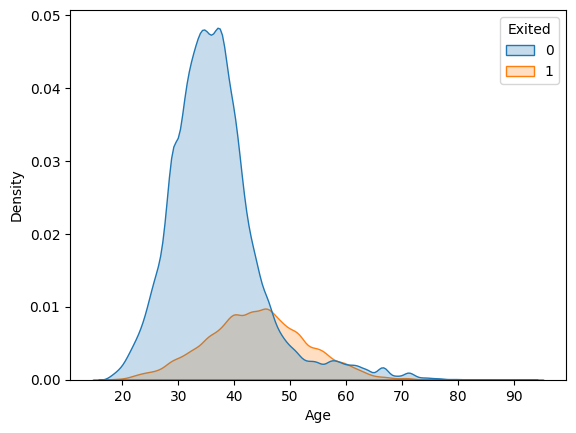

In [7]:
sns.kdeplot(data=churn_data, x='Age', hue='Exited', shade=True)

# Preprocessing

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('int64')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('int64')

label_encoder.fit(churn_data['Geography'])
churn_data['Geography'] = label_encoder.transform(churn_data['Geography'])

label_encoder.fit(churn_data['Gender'])
churn_data['Gender'] = label_encoder.transform(churn_data['Gender'])

churn_data['Age'] = churn_data['Age'].astype('int64')
churn_data['Age_Tenure_ratio'] = churn_data['Age'] / churn_data['Tenure']

churn_data['Age60+'] = churn_data['Age'].apply(lambda x: 1 if x > 60 else 0)

churn_data['ActiveUsers'] = churn_data['HasCrCard'] * churn_data['IsActiveMember']

churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Tenure_ratio,Age60+,ActiveUsers
id,,,,,,,,,,,,,,
0,668,0,1,33,3,0.00,2,1,0,181449.97,0,11.000000,0,0
1,627,0,1,33,1,0.00,2,1,1,49503.50,0,33.000000,0,1
2,678,0,1,40,10,0.00,2,1,0,184866.69,0,4.000000,0,0
3,581,0,1,34,2,148882.54,1,1,1,84560.88,0,17.000000,0,1
4,716,2,1,33,5,0.00,2,1,1,15068.83,0,6.600000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33,2,0.00,1,1,1,131834.75,0,16.500000,0,1
165030,792,0,1,35,3,0.00,1,0,0,131834.45,0,11.666667,0,0
165031,565,0,1,31,5,0.00,1,1,1,127429.56,0,6.200000,0,1


# Correlation HeatMap

<Axes: >

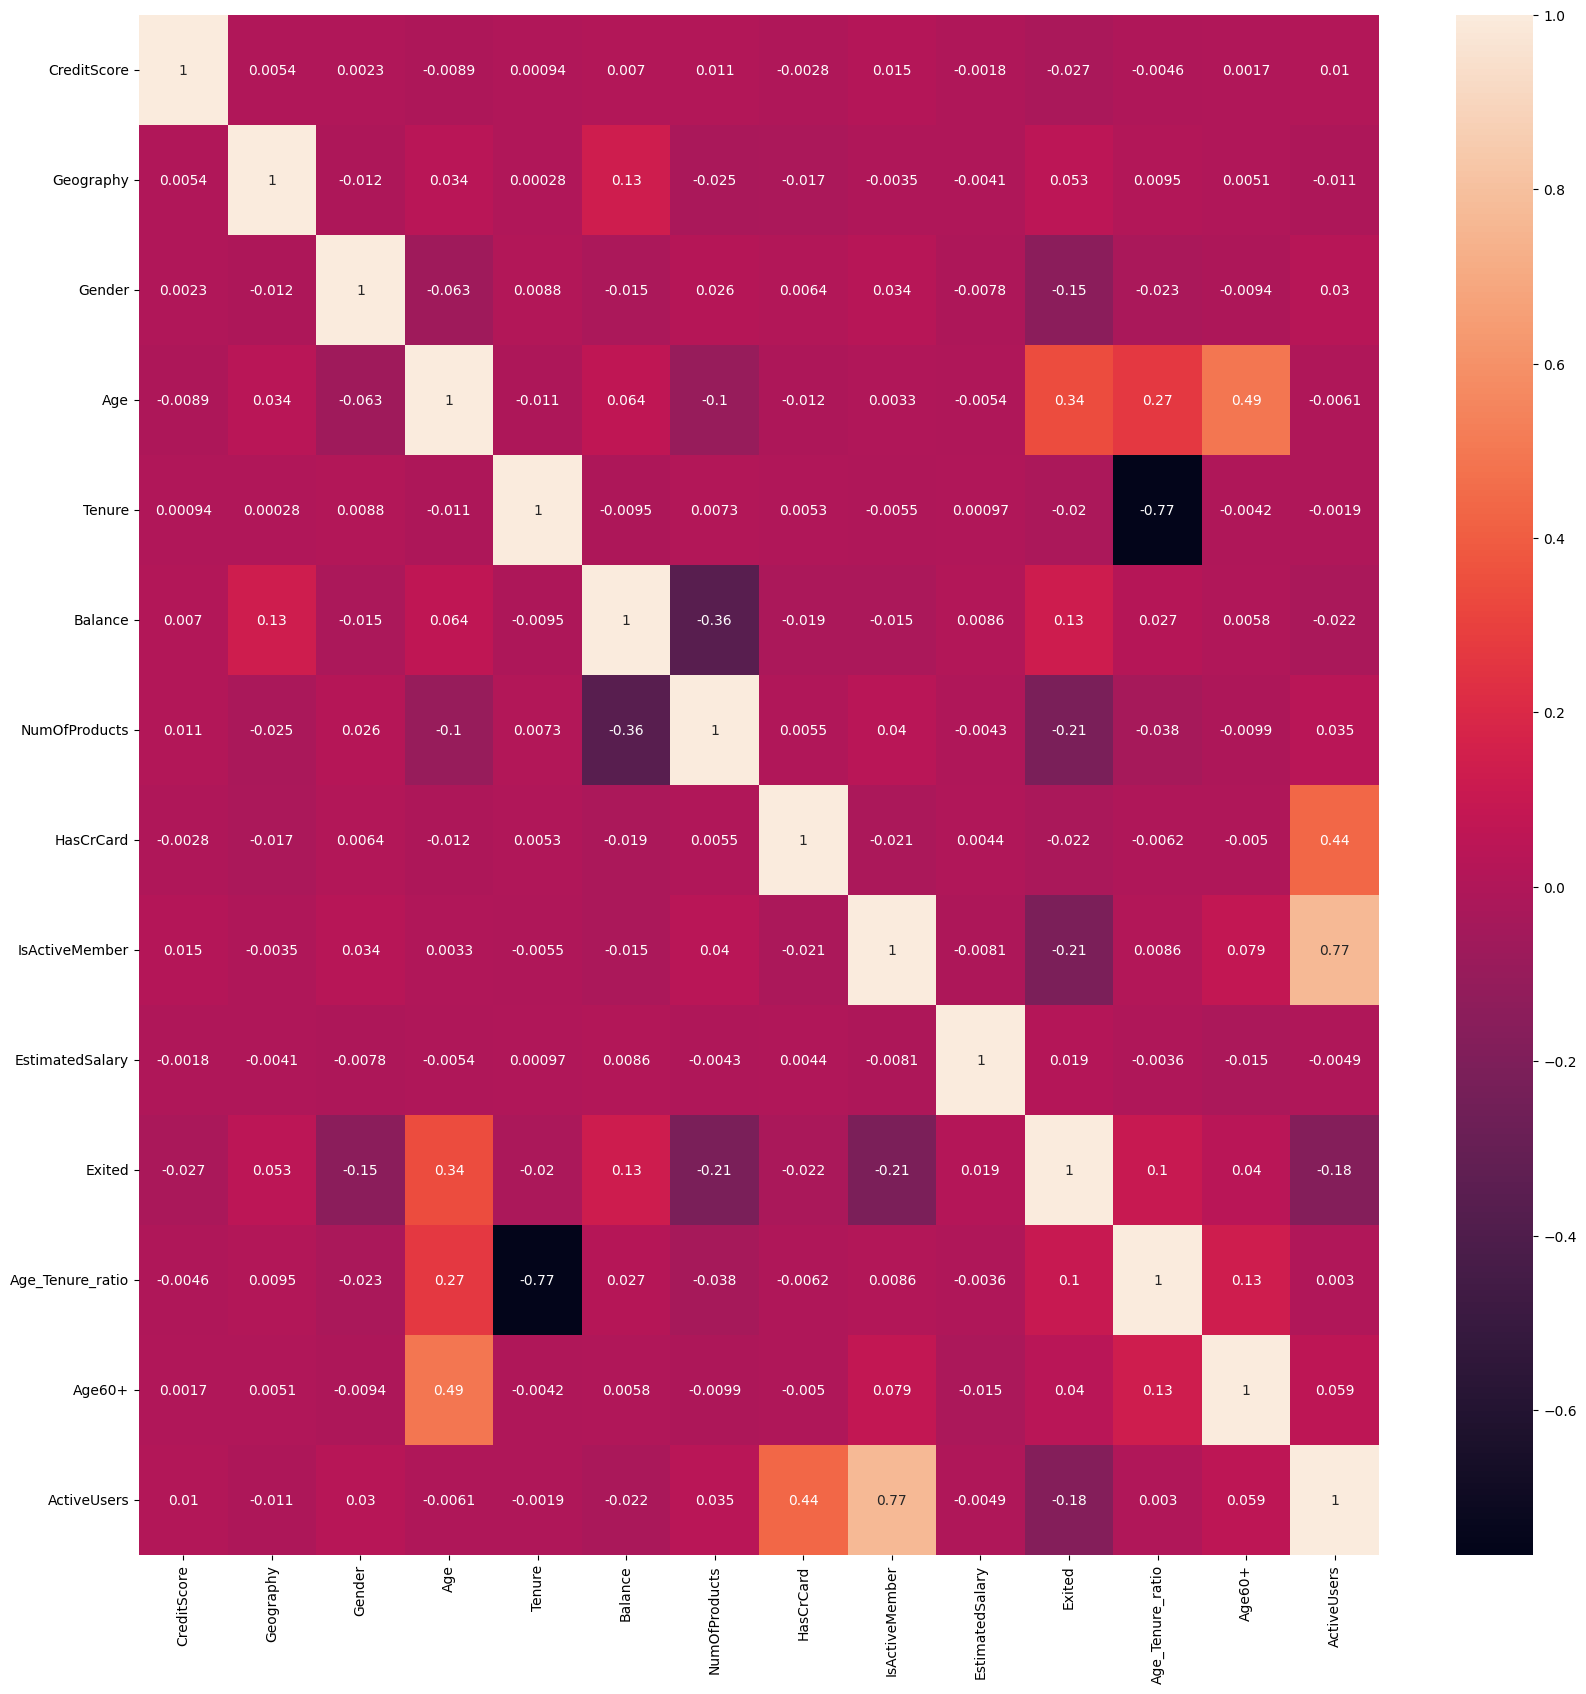

In [9]:
correl = churn_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data = correl, annot = True)

# Spliting Data

In [10]:
from sklearn.model_selection import train_test_split

y = churn_data['Exited']
X = churn_data.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# RandomForestClassifier model


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

class RFClassifier:
    def __init__(self, n_estim):
        self.n_estim = n_estim
        self.trees = []
        
    def fit(self, X, y):
        model = RandomForestClassifier(n_estimators = self.n_estim, n_jobs = 16, bootstrap = True, random_state = 42)
        model.fit(X, y)
        return self.trees.append(model)
    
    def predict(self, X):
        return self.trees[0].predict_proba(X)[:, 1]
    
    def score(self, X, y):
        predictions = self.predict(X)
        return roc_auc_score(y, predictions)

# ROC AUC score

In [12]:
# model = RFClassifier(300)
# model.fit(X_train, y_train)
# print(f'ROC AUC RFC-model:{model.score(X_test, y_test)}')

# Submission preprocessing

In [13]:
churn_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv', index_col = 'id')
churn_test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [14]:
churn_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv', index_col = 'id')
churn_test.drop(['CustomerId','Surname'],axis = 1, inplace = True)

churn_test['HasCrCard'] = churn_test['HasCrCard'].astype('int64')
churn_test['IsActiveMember'] = churn_test['IsActiveMember'].astype('int64')

label_encoder.fit(churn_test['Geography'])
churn_test['Geography'] = label_encoder.transform(churn_test['Geography'])

label_encoder.fit(churn_test['Gender'])
churn_test['Gender'] = label_encoder.transform(churn_test['Gender'])

churn_test['ActiveUsers'] = churn_test['HasCrCard'] * churn_test['IsActiveMember']

churn_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ActiveUsers
id,,,,,,,,,,,
165034,586,0,0,23.0,2,0.00,2,0,1,160976.75,0
165035,683,0,0,46.0,2,0.00,1,1,0,72549.27,0
165036,656,0,0,34.0,7,0.00,2,1,0,138882.09,0
165037,681,0,1,36.0,8,0.00,1,1,0,113931.57,0
165038,752,1,1,38.0,10,121263.62,1,1,0,139431.00,0
...,...,...,...,...,...,...,...,...,...,...,...
275052,570,2,1,29.0,7,116099.82,1,1,1,148087.62,1
275053,575,0,0,36.0,4,178032.53,1,1,1,42181.68,1
275054,712,0,1,31.0,2,0.00,2,1,0,16287.38,0


In [15]:
# X = churn_test
# pd.DataFrame({'Excited':model.predict(X)}, index = churn_test.index)

# CatBoostClassifier

In [16]:
from catboost import CatBoostClassifier

class CatBoostClass:
    def __init__(self, iterations, l_r):
        self.iterations = iterations
        self.l_r = l_r
        self.trees = []
        
    def fit(self, X, y):
        model = CatBoostClassifier(iterations = self.iterations, learning_rate = self.l_r)
        model.fit(X_train, y_train)
        return self.trees.append(model)
    
    def predict(self, X):
        return self.trees[0].predict_proba(X)[:, 1]
    
    def score(self, X, y):
        predictions = self.predict(X)
        return roc_auc_score(y, predictions)
    

# AUC ROC score

In [17]:
model = CatBoostClass(iterations = 20, l_r = 0.5)

model.fit(X_train, y_train)

print(f'ROC AUC RFC-model:{model.score(X_test, y_test)}')

0:	learn: 0.4797518	total: 68.9ms	remaining: 1.31s
1:	learn: 0.4002532	total: 83.1ms	remaining: 748ms
2:	learn: 0.3605169	total: 97.8ms	remaining: 554ms
3:	learn: 0.3428353	total: 111ms	remaining: 444ms
4:	learn: 0.3349337	total: 123ms	remaining: 368ms
5:	learn: 0.3289163	total: 135ms	remaining: 316ms
6:	learn: 0.3255436	total: 148ms	remaining: 275ms
7:	learn: 0.3240597	total: 161ms	remaining: 241ms
8:	learn: 0.3231397	total: 175ms	remaining: 214ms
9:	learn: 0.3215717	total: 190ms	remaining: 190ms
10:	learn: 0.3210298	total: 202ms	remaining: 165ms
11:	learn: 0.3205478	total: 214ms	remaining: 143ms
12:	learn: 0.3200744	total: 227ms	remaining: 122ms
13:	learn: 0.3196574	total: 239ms	remaining: 102ms
14:	learn: 0.3191573	total: 251ms	remaining: 83.8ms
15:	learn: 0.3188384	total: 263ms	remaining: 65.6ms
16:	learn: 0.3186440	total: 275ms	remaining: 48.6ms
17:	learn: 0.3183732	total: 288ms	remaining: 32ms
18:	learn: 0.3181515	total: 299ms	remaining: 15.7ms
19:	learn: 0.3178493	total: 309ms	r

# Make Predictions

In [18]:
# X = churn_test
# test_predictions = model.predict(X)

# Create Submissions

In [19]:
# submission_df = pd.DataFrame({'id': churn_test.index, 'Exited': test_predictions})
# submission_df.to_csv('submission_1.csv', index=False)

# CatBoost 2

In [20]:
churn_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv', index_col = 'id')
churn_data.drop(['CustomerId'],axis = 1, inplace = True)

label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(churn_data['Surname'])
churn_data['Surname'] = label_encoder.transform(churn_data['Surname'])

churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('int64')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('int64')

churn_data['Age'] = churn_data['Age'].astype('int64')
churn_data['Age_Tenure_ratio'] = churn_data['Age'] / churn_data['Tenure']

churn_data['Age60+'] = churn_data['Age'].apply(lambda x: 0 if x > 60 else 1)

churn_data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Tenure_ratio,Age60+
id,,,,,,,,,,,,,,
0,1924,668,France,Male,33,3,0.00,2,1,0,181449.97,0,11.000000,1
1,1925,627,France,Male,33,1,0.00,2,1,1,49503.50,0,33.000000,1
2,1178,678,France,Male,40,10,0.00,2,1,0,184866.69,0,4.000000,1
3,1299,581,France,Male,34,2,148882.54,1,1,1,84560.88,0,17.000000,1
4,467,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0,6.600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1701,667,Spain,Female,33,2,0.00,1,1,1,131834.75,0,16.500000,1
165030,1918,792,France,Male,35,3,0.00,1,0,0,131834.45,0,11.666667,1
165031,1172,565,France,Male,31,5,0.00,1,1,1,127429.56,0,6.200000,1


In [21]:
churn_data.CreditScore.describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

/tmp/ipykernel_18/106139272.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=churn_data, x='Age', hue='Exited', shade=True)


<Axes: xlabel='Age', ylabel='Density'>

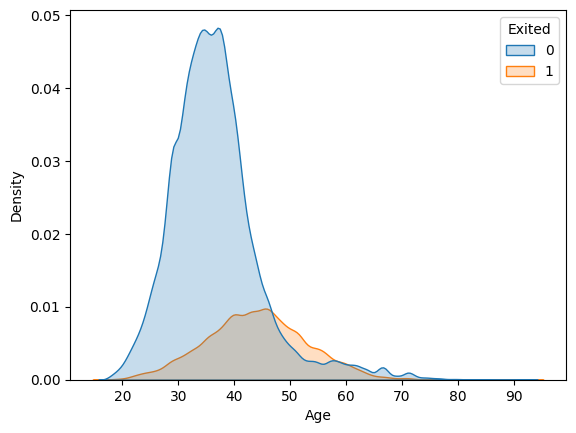

In [22]:
sns.kdeplot(data=churn_data, x='Age', hue='Exited', shade=True)

In [23]:
cat_features = ['Geography', 'Gender']

y = churn_data['Exited']
X = churn_data.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from catboost import CatBoostClassifier

class CatBoostClass:
    def __init__(self, iterations, l_r, verbose):
        self.verbose = verbose
        self.iterations = iterations
        self.l_r = l_r
        self.trees = []
        
    def fit(self, X, y, X_val, y_val):
        model = CatBoostClassifier(iterations = self.iterations, learning_rate = self.l_r,
                                   custom_loss =['AUC', 'Accuracy'], 
                                  verbose = self.verbose, random_seed=42)
        model.fit(X_train, y_train, cat_features = cat_features, eval_set = (X_val, y_val))
        return self.trees.append(model)
    
    def predict(self, X):
        return self.trees[0].predict_proba(X)[:, 1]
    
    def score(self, X, y):
        predictions = self.predict(X)
        return roc_auc_score(y, predictions)

In [25]:
model = CatBoostClass(iterations = 1000, l_r = 0.5, verbose = 100)

model.fit(X_train, y_train, X_test, y_test)

print(f'ROC AUC CBC-model:{model.score(X_test, y_test)}')

0:	learn: 0.4047714	test: 0.4058664	best: 0.4058664 (0)	total: 67.3ms	remaining: 1m 7s
100:	learn: 0.2979116	test: 0.3216270	best: 0.3204523 (55)	total: 6.12s	remaining: 54.5s
200:	learn: 0.2832292	test: 0.3262058	best: 0.3204523 (55)	total: 12.3s	remaining: 49.1s
300:	learn: 0.2704579	test: 0.3299767	best: 0.3204523 (55)	total: 18.7s	remaining: 43.5s
400:	learn: 0.2593342	test: 0.3334338	best: 0.3204523 (55)	total: 24.8s	remaining: 37s
500:	learn: 0.2489190	test: 0.3364550	best: 0.3204523 (55)	total: 30.9s	remaining: 30.7s
600:	learn: 0.2394548	test: 0.3396955	best: 0.3204523 (55)	total: 36.9s	remaining: 24.5s
700:	learn: 0.2310590	test: 0.3435820	best: 0.3204523 (55)	total: 43.1s	remaining: 18.4s
800:	learn: 0.2228138	test: 0.3470305	best: 0.3204523 (55)	total: 49.5s	remaining: 12.3s
900:	learn: 0.2151552	test: 0.3513146	best: 0.3204523 (55)	total: 55.6s	remaining: 6.11s
999:	learn: 0.2076327	test: 0.3542537	best: 0.3204523 (55)	total: 1m 1s	remaining: 0us

bestTest = 0.3204522674
be

In [26]:
churn_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv', index_col = 'id')
churn_test.drop(['CustomerId'],axis = 1, inplace = True)

label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(churn_test['Surname'])
churn_test['Surname'] = label_encoder.transform(churn_test['Surname'])

churn_test['HasCrCard'] = churn_test['HasCrCard'].astype('int64')
churn_test['IsActiveMember'] = churn_test['IsActiveMember'].astype('int64')

churn_test['Age'] = churn_test['Age'].astype('int64')
churn_test['Age_Tenure_ratio'] = churn_test['Age'] / churn_test['Tenure']

churn_test['Age60+'] = churn_test['Age'].apply(lambda x: 0 if x > 60 else 1)

churn_test


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Tenure_ratio,Age60+
id,,,,,,,,,,,,,
165034,1482,586,France,Female,23,2,0.00,2,0,1,160976.75,11.500000,1
165035,1812,683,France,Female,46,2,0.00,1,1,0,72549.27,23.000000,1
165036,1246,656,France,Female,34,7,0.00,2,1,0,138882.09,4.857143,1
165037,1832,681,France,Male,36,8,0.00,1,1,0,113931.57,4.500000,1
165038,1079,752,Germany,Male,38,10,121263.62,1,1,0,139431.00,3.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275052,1933,570,Spain,Male,29,7,116099.82,1,1,1,148087.62,4.142857,1
275053,579,575,France,Female,36,4,178032.53,1,1,1,42181.68,9.000000,1
275054,410,712,France,Male,31,2,0.00,2,1,0,16287.38,15.500000,1


In [27]:
X = churn_test
test_predictions = model.predict(X)
test_predictions

array([0.02824522, 0.82907638, 0.02669591, ..., 0.01141711, 0.18272628,
       0.15315715])

In [28]:
submission_df = pd.DataFrame({'id': churn_test.index, 'Exited': test_predictions})
submission_df.to_csv('submission.csv', index=False)
submission_df

,id,Exited
0,165034,0.028245
1,165035,0.829076
2,165036,0.026696
3,165037,0.257537
4,165038,0.279751
...,...,...
110018,275052,0.029394
110019,275053,0.141168
110020,275054,0.011417
110021,275055,0.182726
